# Linear Regression

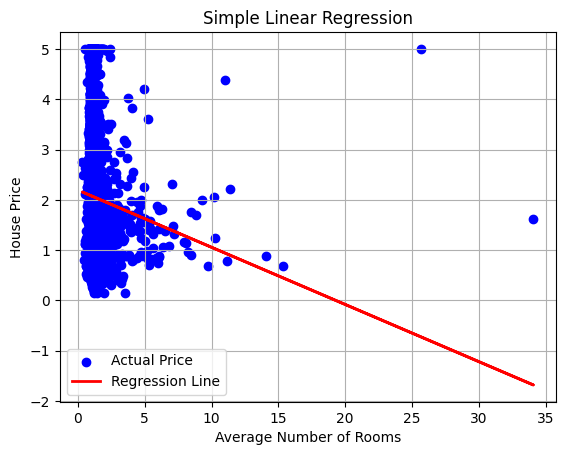

In [2]:
# Task1:-
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np


housing = fetch_california_housing()
X = housing.data[:, [3]]  
y = housing.target

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.scatter(X, y, color='blue', label='Actual Price')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Average Number of Rooms')
plt.ylabel('House Price')
plt.title('Simple Linear Regression')
plt.legend()
plt.grid(True)
plt.show()


In [3]:
# Task2:-
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
housing = fetch_california_housing()

X_multi = housing.data  
y_multi = housing.target

X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

y_pred_multi = multi_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_multi)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_multi)

print("R-squared:", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

print("\nFeature Coefficients:")
for name, coef in zip(housing.feature_names, multi_model.coef_):
    print(f"{name}: {coef}")


R-squared: 0.5757877060324523
Mean Squared Error (MSE): 0.5558915986952424
Root Mean Squared Error (RMSE): 0.7455813830127751

Feature Coefficients:
MedInc: 0.44867490966571894
HouseAge: 0.009724257517905413
AveRooms: -0.12332334282795913
AveBedrms: 0.7831449067929733
Population: -2.029620580143443e-06
AveOccup: -0.0035263184871342293
Latitude: -0.41979248658835716
Longitude: -0.4337080649639876


In [4]:
# Task3:-
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
housing = fetch_california_housing()
X_multi = housing.data  
y_multi = housing.target

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
scaled_model = LinearRegression()
scaled_model.fit(X_train_scaled, y_train)

y_pred_scaled = scaled_model.predict(X_test_scaled)
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)
y_pred_multi = multi_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_multi)
rmse = np.sqrt(mse)
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
rmse_scaled = np.sqrt(mse_scaled)

r2 = r2_score(y_test, y_pred_multi)
r2_scaled = r2_score(y_test, y_pred_scaled)

print("\nBefore Scaling:")
print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")

print("\nAfter Scaling:")
print(f"MSE: {mse_scaled:.4f}, RMSE: {rmse_scaled:.4f}, R2: {r2_scaled:.4f}")



Before Scaling:
MSE: 0.5559, RMSE: 0.7456, R2: 0.5758

After Scaling:
MSE: 0.5559, RMSE: 0.7456, R2: 0.5758


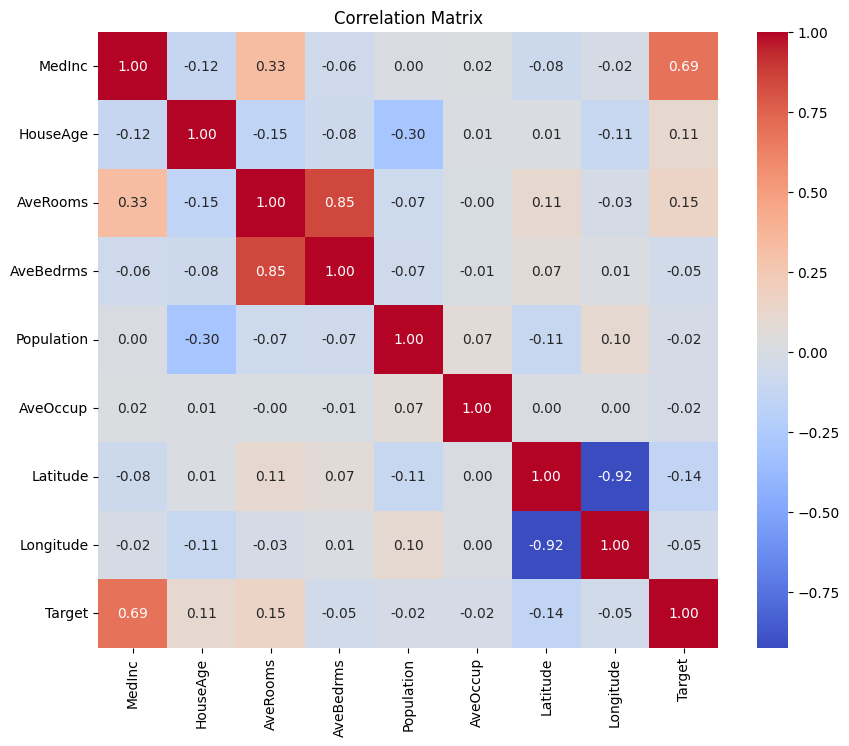


Strongest Relationships with Target:
 MedInc        0.688075
AveRooms      0.151948
Latitude      0.144160
HouseAge      0.105623
AveBedrms     0.046701
Longitude     0.045967
Population    0.024650
AveOccup      0.023737
Name: Target, dtype: float64

Note: Features with high correlation with each other (off-diagonal values close to 1 or -1) indicate multicollinearity,
which can reduce model interpretability and inflate coefficient estimates.


In [5]:
# Task4:-
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['Target'] = housing.target

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

correlation_with_target = df.corr()['Target'].drop('Target')
strongest_features = correlation_with_target.abs().sort_values(ascending=False)
print("\nStrongest Relationships with Target:\n", strongest_features)

print("\nNote: Features with high correlation with each other (off-diagonal values close to 1 or -1) indicate multicollinearity,")
print("which can reduce model interpretability and inflate coefficient estimates.")


# Logistic Regression

In [ ]:
# Task1:-
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='ROC Curve', color='blue')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Task2:-
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np


data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
thresholds_to_try = [0.3, 0.5, 0.7]

for threshold in thresholds_to_try:
    y_pred_threshold = (y_prob >= threshold).astype(int)
    print(f"\nThreshold: {threshold}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_threshold))
    print("F1 Score:", classification_report(y_test, y_pred_threshold, output_dict=True)['weighted avg']['f1-score'])


fpr, tpr, thresholds = roc_curve(y_test, y_prob)

youden_index = tpr - fpr
best_idx = np.argmax(youden_index)
best_threshold = thresholds[best_idx]

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='ROC Curve', color='green')
plt.scatter(fpr[best_idx], tpr[best_idx], marker='o', color='red', label=f'Best Threshold = {best_threshold:.2f}')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Best Threshold')
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Threshold by Youden's J Index: {best_threshold}")


In [ ]:
# Task3:-
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

iris = load_iris()
X_iris = iris.data
y_iris = iris.target

X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

iris_model = LogisticRegression(multi_class='ovr', max_iter=1000)
iris_model.fit(X_train_iris, y_train_iris)

y_pred_iris = iris_model.predict(X_test_iris)

print("Accuracy:", accuracy_score(y_test_iris, y_pred_iris))
print("\nClassification Report:\n", classification_report(y_test_iris, y_pred_iris))


Ques.1. What are the assumptions of linear regression?
Ans.1. Linear regression assumes a linear relationship between the independent and dependent variables. It also assumes homoscedasticity (constant variance of errors), independence of observations, and normally distributed residuals. Additionally, multicollinearity among independent variables should be minimal.


Ques.2.When should you use logistic regression instead of linear regression?
Ans.2.Use logistic regression when the target variable is categorical, especially binary (e.g., yes/no, 0/1). Linear regression is not suitable for classification because it can predict values outside the range [0, 1], while logistic regression outputs probabilities. Logistic regression also models a decision boundary to separate classes.


Ques.3.What is the interpretation of coefficients in logistic regression?
Ans.3.In logistic regression, each coefficient represents the change in the log-odds of the outcome for a one-unit increase in the corresponding feature. A positive coefficient increases the likelihood of the positive class, while a negative coefficient decreases it. The exponentiated coefficient (e^β) gives the odds ratio.


Ques.4.What is the difference between sigmoid and softmax functions?
Ans.4.The sigmoid function maps a real-valued number to a probability between 0 and 1, making it suitable for binary classification. The softmax function generalizes this to multi-class classification by converting a vector of scores into probabilities that sum to 1 across multiple classes. Sigmoid is used in logistic regression, while softmax is used in multinomial logistic regression.


Ques.5. Why is R-squared not suitable for evaluating logistic regression models?
Ans.5.R-squared measures how well continuous values fit a regression line, which doesn't apply to classification tasks. Logistic regression outputs probabilities and makes discrete predictions, so metrics like accuracy, precision, recall, and ROC-AUC are more appropriate. R-squared can be misleading in this context.